## Meta -

This file is an object detection model built using keras

## Author - Rahul Suresh

In [ ]:
#model performance would improve if a more extensively trained CIFAR10 or similar object detection model were used

In [ ]:
#model divides image into 4 parts and then detects whether or not car is present in each quadrant

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import scipy
from PIL import Image, ImageDraw

Using TensorFlow backend.


In [2]:
img = Image.open( 'cropped2.jpg' )
img.load()
data = np.asarray( img, dtype="int32" )

Text(0.5, 1.0, 'Input Image')

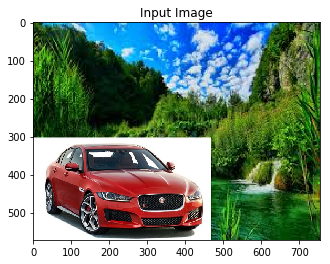

In [3]:
plt.imshow(data)
plt.title("Input Image")

In [4]:
data.shape

(572, 754, 3)

In [5]:
#load image as numpy array.
#now divde image into four parts and display each

In [6]:
height, width, channels=data.shape

In [7]:
h2=height//2
w2=width//2

In [8]:
data_lt=data[:h2,:w2]
data_rt=data[:h2,w2:]
data_lb=data[h2:,:w2]
data_rb=data[h2:,w2:]

Text(0.5, 1.0, 'LT Sliced Image')

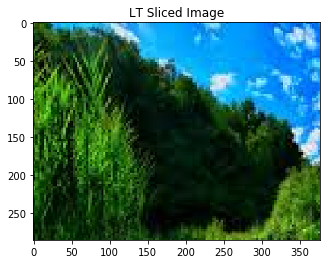

In [9]:
plt.imshow(data_lt)
plt.title("LT Sliced Image")

In [10]:
#reshape arrays to model input size
#or we could make all images of size of biggest fragment and then reshape later
size=32,32
data_rt=scipy.misc.imresize(data_rt,size)
data_lt=scipy.misc.imresize(data_lt,size)
data_rb=scipy.misc.imresize(data_rb,size)
data_lb=scipy.misc.imresize(data_lb,size)


/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarni

In [11]:
data2=np.array([data_lt,data_rt,data_lb,data_rb])

In [12]:
data2.shape

(4, 32, 32, 3)

In [13]:
#get data in the shape of 4,32,32,3, be careful it may not happen if the component images are of different size

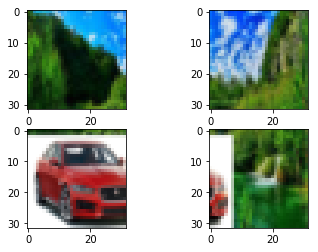

In [14]:
# create a grid of 2x2 images
for i in range(0, 4):
    plt.subplot(221 + i)
    plt.imshow(data2[i])
# show the plot
plt.show()

In [15]:
data_whole1 = np.zeros(shape=(64,64,3),dtype='int32')
data_whole1[:32,:32]=data2[0]
data_whole1[:32,32:]=data2[1]
data_whole1[32:,:32]=data2[2]
data_whole1[32:,32:]=data2[3]


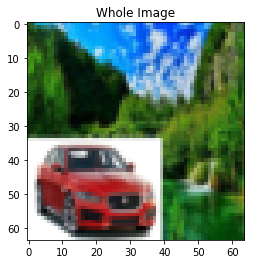

In [16]:
plt.imshow(data_whole1)
plt.title("Whole Image")
plt.savefig('Input.jpg')

In [17]:
#run CIFAR10 model on each part

In [18]:
reload_filename='augmodel/model-03-1.4298.hdf5'
model = load_model(reload_filename)

In [19]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [20]:
data2.shape

(4, 32, 32, 3)

In [21]:
result=model.predict(data2)

In [22]:
result.shape

(4, 10)

In [23]:
def draw_bounding_box(input_data):
    im = Image.fromarray(input_data.astype('uint8'))
    draw = ImageDraw.Draw(im)
    draw.rectangle((1, 1, im.size[0]-1, im.size[1]-1), outline=128, width=2)
    topleft=0,0
    draw.text(topleft, 'CAR')
    del draw
    output_data = np.asarray( im, dtype="int32" )
    #im.show()
    #im.save("example", "PNG")
    #to display - im in new cell
    return output_data
    #plt.imshow(output_data)

In [24]:
for i in range(0,4):
    if(labels[np.argmax(result[i])]=='automobile'):
        print('car found')
        data2[i]=draw_bounding_box(data2[i])
        #draw_bounding_box_where ever car is present

car found


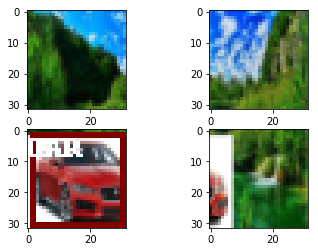

In [25]:
# create a grid of 2x2 images
for i in range(0, 4):
    plt.subplot(221 + i)
    plt.imshow(data2[i])
# show the plot
plt.show()

In [26]:
data_whole = np.zeros(shape=(64,64,3),dtype='int32')
data_whole[:32,:32]=data2[0]
data_whole[:32,32:]=data2[1]
data_whole[32:,:32]=data2[2]
data_whole[32:,32:]=data2[3]

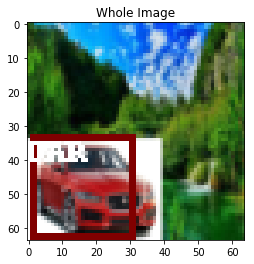

In [27]:
plt.imshow(data_whole)
plt.title("Whole Image")
plt.savefig('output.jpg')